# Importing Libraries and Data

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [56]:
%matplotlib inline

In [57]:
path = r'/Users/hollyringsak/Documents/6.1 KCA House Data'
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'kc_house_data_clean.csv'), index_col= False)

# Data Cleaning

In [58]:
df.shape

(21612, 22)

In [59]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,1418083200000000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,1418083200000000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [87]:
#make subset for analysis
df_set = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','condition', 'grade','view', 'lat', 'long','sqft_living15', 'sqft_lot15']]

In [62]:
df_set.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,7,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,7,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,6,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,7,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,8,47.6168,-122.045,1800,7503


In [63]:
df_set.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
grade              int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [64]:
# Standardize the data
scaler = StandardScaler()
df_scale = scaler.fit_transform(df_set)

# Elbow Technique

In [65]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [66]:
score = [kmeans[i].fit(df_scale).score(df_scale) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-237731.9999999999,
 -178910.20114728424,
 -154727.72404636507,
 -135137.6058146787,
 -124901.9368933313,
 -116461.67843815128,
 -108343.63819430335,
 -102124.5979170171,
 -97645.01152376286]

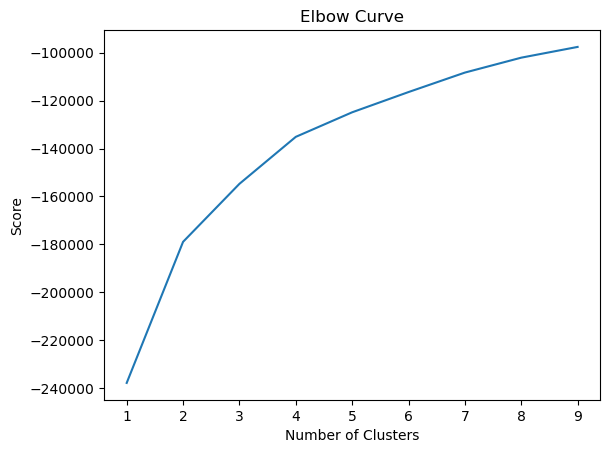

In [67]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [68]:
# The optimal amount of clusters is 4

# K-means clustering

In [69]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [75]:
# Fit the k-means object to the data.

kmeans.fit(df_set)

/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [76]:
df_set['clusters'] = kmeans.fit_predict(df_set)

/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/13/511ckzmj56s_07l1n83g1xvw0000gn/T/ipykernel_45625/1351740328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_set['clusters'] = kmeans.fit_predict(df_set)


In [77]:
df_set.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,lat,long,sqft_living15,sqft_lot15,clusters
0,221900.0,3,1.00,1180,5650,1.0,7,47.5112,-122.257,1340,5650,1
1,538000.0,3,2.25,2570,7242,2.0,7,47.7210,-122.319,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,6,47.7379,-122.233,2720,8062,1
3,604000.0,4,3.00,1960,5000,1.0,7,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,8,47.6168,-122.045,1800,7503,1


In [78]:
df_set['clusters'].value_counts()

clusters
1    12937
0     7256
3     1229
2      190
Name: count, dtype: int64

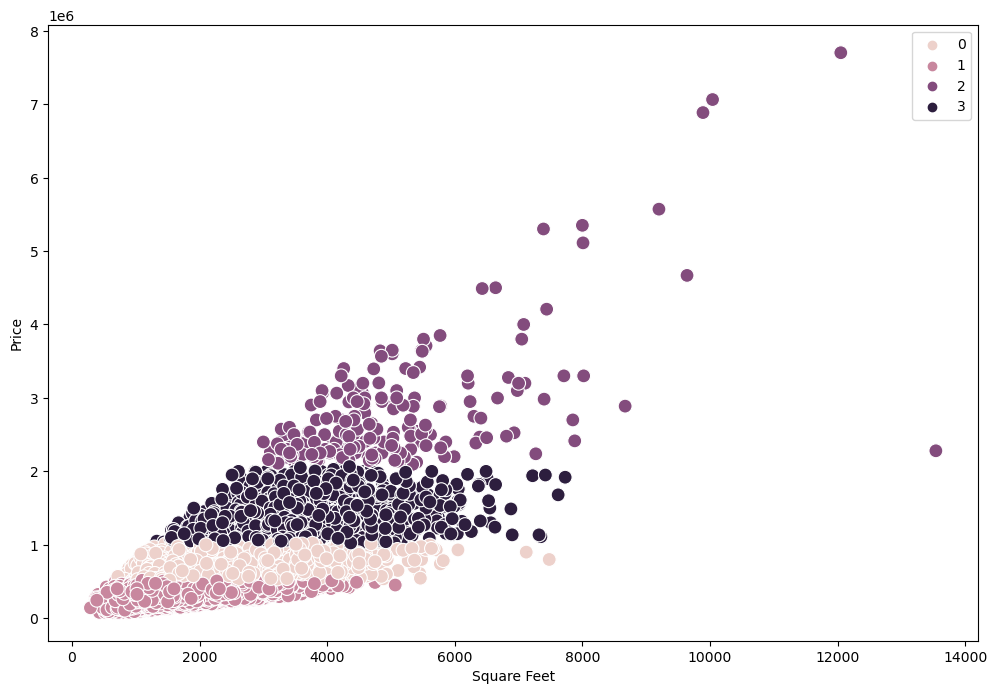

In [79]:
# Plot the clusters for the "Price" and "sqft_living" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_set['sqft_living'], y=df_set['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Square Feet') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

## There are no homes in the purple (2) cluster that are under 3000 sqft. There are no homes in the dark pink (1) cluster above 5000 square feet. 

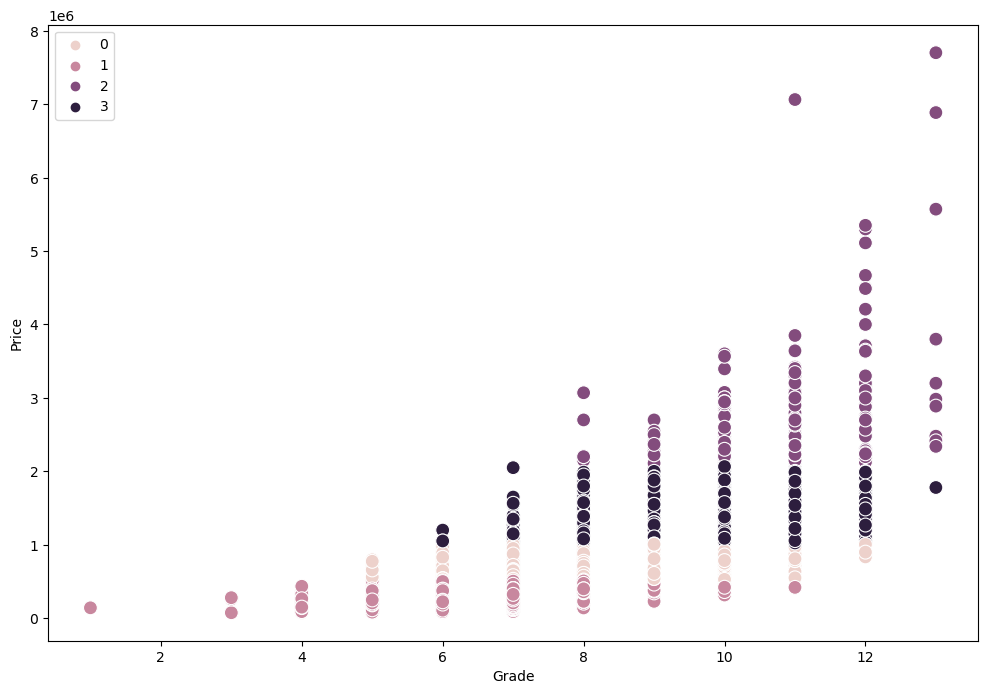

In [81]:
# Plot the clusters for the grade and price variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_set['grade'], y=df_set['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Grade') 
plt.ylabel('Price') 
plt.show()

## There are no homes in the purple (2) cluster that have a grade lower than 8. There are no homes in the dark pink(1) cluster with a grade above 11.

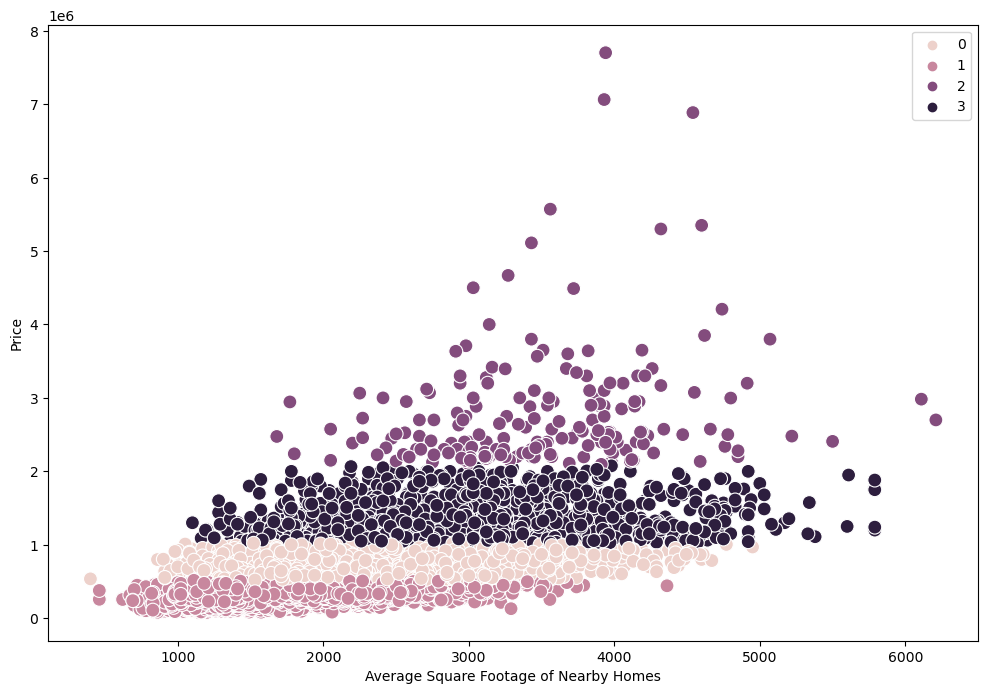

In [97]:
# Plot the clusters for the grade and price variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_set['sqft_living15'], y=df_set['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Average Square Footage of Nearby Homes') 
plt.ylabel('Price') 
plt.show()

## The cheaper homes have a lower average sqft. of homes close to them. Perhaps there are certain neighborhoods with cheaper homes.

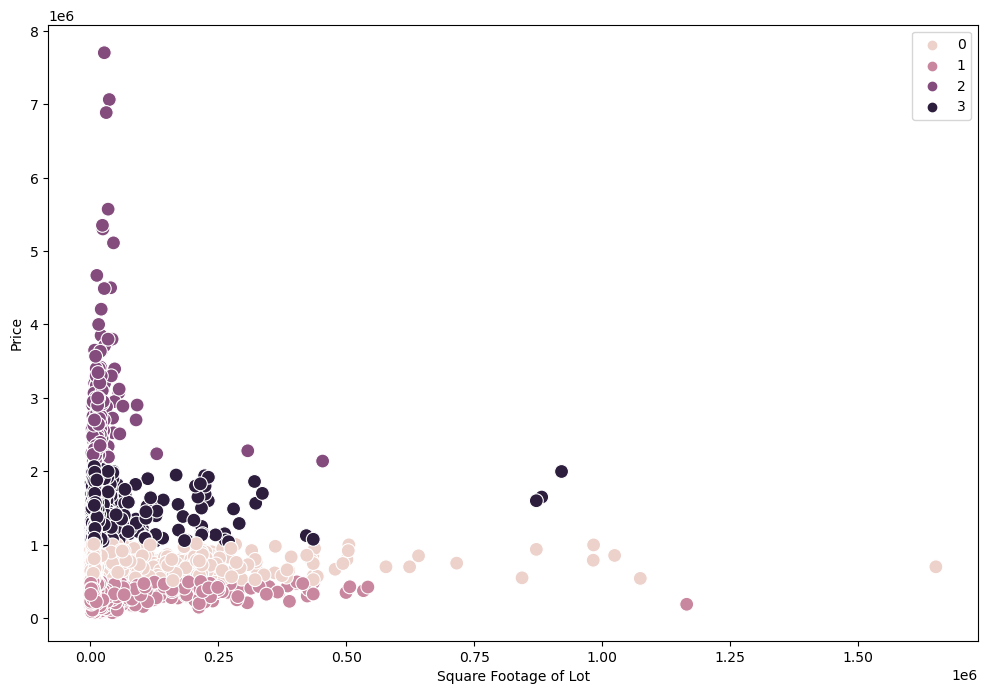

In [98]:
# Plot the clusters for the grade and price variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_set['sqft_lot'], y=df_set['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Square Footage of Lot') 
plt.ylabel('Price') 
plt.show()

## There are surprisingly no homes in the purple(2) cluster that have lots larger than 0.50. It's surprising consider they represent homes of a higher value. 

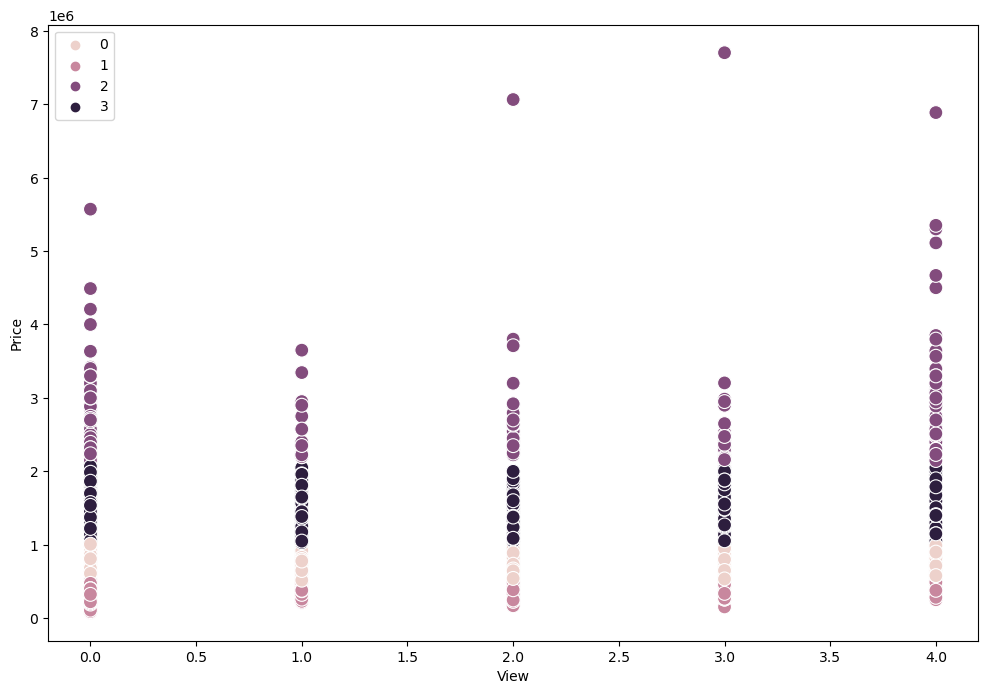

In [96]:
# Plot the clusters for the view and price variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_set['view'], y=df_set['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('View') 
plt.ylabel('Price') 
plt.show()

## Theres an even distribution of each cluster in each view ranking.

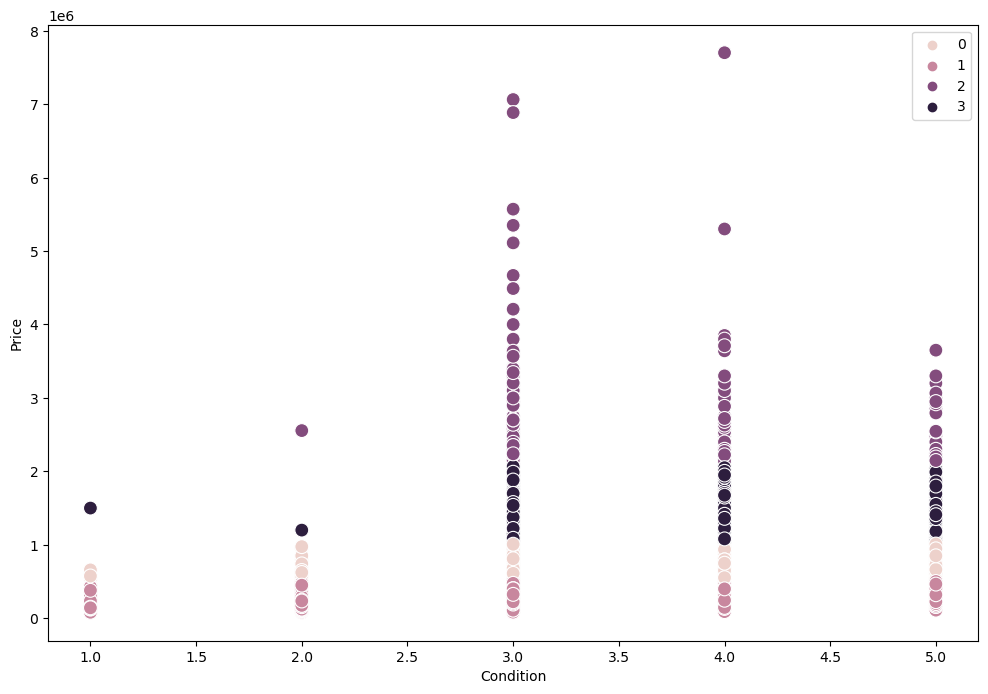

In [84]:
# Plot the clusters for the condition and price variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_set['condition'], y=df_set['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Condition') 
plt.ylabel('Price') 
plt.show()

## Only one home in the purple (1) cluster with a condition under 3

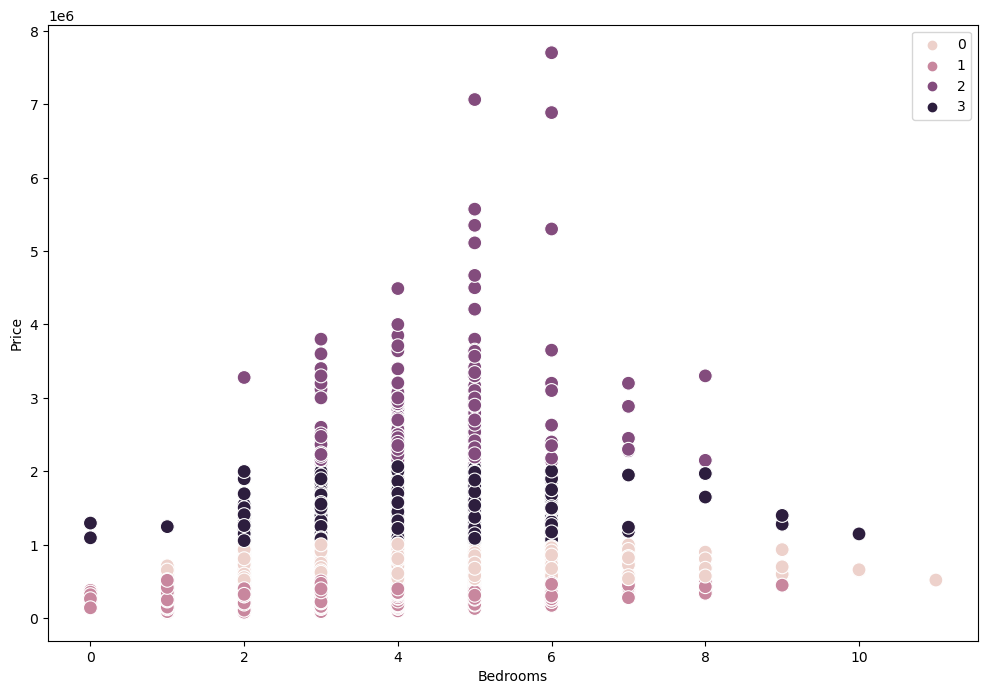

In [85]:
# Plot the clusters for the bedrooms and price variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_set['bedrooms'], y=df_set['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Bedrooms') 
plt.ylabel('Price') 
plt.show()

## No homes in the purple cluster with less than 2 bedrooms

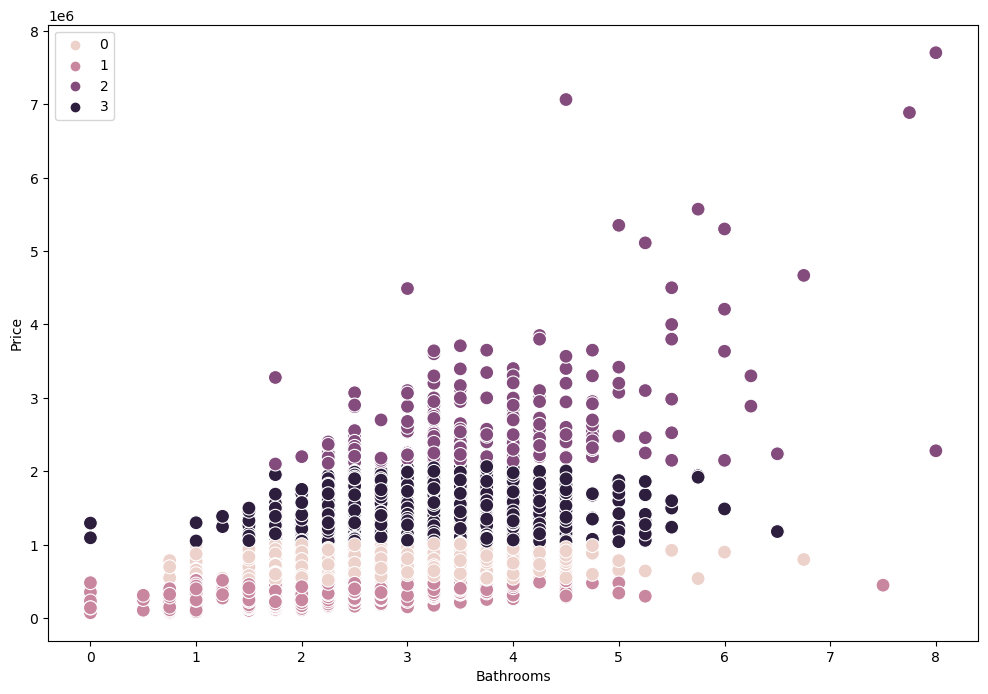

In [86]:
# Plot the clusters for the bathrooms and price variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_set['bathrooms'], y=df_set['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Bathrooms') 
plt.ylabel('Price') 
plt.show()

## No homes in the purple cluster with less than 1.75 bathrooms

In [89]:
df_set.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df_set.loc[df['clusters'] == 1, 'cluster'] = 'dark pink'
df_set.loc[df['clusters'] == 0, 'cluster'] = 'pink'
df_set.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'

/var/folders/13/511ckzmj56s_07l1n83g1xvw0000gn/T/ipykernel_45625/2786134482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_set.loc[df['clusters'] == 2, 'cluster'] = 'purple'


In [95]:
df_set.groupby('cluster').agg({'sqft_living':['mean', 'median','max'], 
                         'grade':['mean', 'median','max'],
                         'condition':['mean', 'median','max'],
                         'bedrooms':['mean', 'median','max'],
                         'bathrooms':['mean', 'median','max'],
                         'view':['mean', 'median','max'],
                         'floors':['mean', 'median','max'],
                          'price':['mean', 'median','max']})

sqft_living                    grade            condition         \
                    mean  median    max      mean median max      mean median   
cluster                                                                         
dark pink    2033.602697  1870.0   8000  7.597270    7.0  13  3.369347    3.0   
dark purple  2068.807292  1890.0   8010  7.636719    7.0  13  3.387804    3.0   
pink         2124.160366  1960.0  13540  7.725876    8.0  13  3.450026    3.0   
purple       2094.851852  1930.0  12050  7.667836    7.0  13  3.430214    3.0   

                 bedrooms  ... bathrooms      view               floors  \
            max      mean  ...       max      mean median max      mean   
cluster                    ...                                            
dark pink     5  3.351751  ...       6.5  0.233350    0.0   4  1.476484   
dark purple   5  3.365885  ...       5.5  0.231120    0.0   4  1.494466   
pink          5  3.395477  ...       8.0  0.233385    0.0   4  1.510530   
purple        5  3.364327  ...       8.0  0.239376    0.0   4  1.497076   

                                 price                       
            median  max           mean    median        max  
cluster                                                      
dark pink      1.0  3.5  544689.378556  454000.0  5350000.0  
dark purple    1.5  3.5  523422.358724  435000.0  5110800.0  
pink           1.5  3.5  550777.229242  465750.0  7062500.0  
purple         1.5  3.5  537513.875049  446225.0  7700000.0  

[4 rows x 24 columns]

# All of the clusters have relatively similar statistics. Pink is the only one that has a higher median grade and a just slightly higher median price. 